to-dos:
1. correlation between categorical col and the target column (anova?)
2. how do deal with a lot of unknown vals in cat cols
3. how to apply clustering to the num cols 


# Introduction
## Problem framing

We deal with a supervised learning regression problem. It is also univaiate multiple regression problem. We solve it using batch learning.

## Metrics selection

In [2]:

import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from platform import python_version

print(python_version())
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

3.11.13
1.26.4
2.2.2
1.4.2


In [3]:
from splitter import splitter

X_train, X_test, y_train, y_test = splitter(".//topic21_v9_train.csv")
print()

In [50]:
X_train[X_train['horsepower'].isna()]

,0,1,2,3,4,brand,model,trim,body_type,fuel_type,transmission_type,engine_capacity_cc,horsepower,exterior_color,interior_color,warranty,city,seller_type
3573,NaN,3.618789,19.297796,0.417109,0.537373,Chevrolet,Equinox,Other,SUV,Petrol,Automatic Transmission,NaN,NaN,Beige,Black,No,Abu Dhabi,Dealer
3217,1.291337,3.729891,-11.834981,0.977601,0.070208,Porsche,Carrera / 911,Carrera S,Coupe,Petrol,Automatic Transmission,NaN,NaN,Red,Beige,No,Dubai,Dealer
5143,0.524861,3.697177,15.284626,0.472173,1.078732,BMW,X5,Xdrive50i,SUV,Petrol,Automatic Transmission,4000+ cc,NaN,White,Brown,Yes,Dubai,Dealer
1158,0.569891,3.682927,19.467867,0.419471,2.110999,Mitsubishi,Montero,Other,SUV,Petrol,Automatic Transmission,NaN,NaN,White,Beige,No,Dubai,Dealer
2498,0.565981,3.623270,15.433341,0.252024,-0.106847,Audi,A4,S-line,Sedan,Petrol,Automatic Transmission,NaN,NaN,White,Black,Yes,Dubai,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,0.443171,3.638581,-2.440064,0.283332,0.449441,MINI,Cooper,Cooper S,Coupe,Petrol,Automatic Transmission,NaN,NaN,Grey,Unknown,Yes,Dubai,Dealer
1529,NaN,3.578158,13.709829,0.247944,-0.431892,Lexus,RX-Series,Other,SUV,Petrol,Automatic Transmission,NaN,NaN,White,Black,Does not apply,Dubai,Dealer
4191,1.277617,3.690190,12.954748,0.990662,-3.324319,Mercedes-Benz,E-Class,E 55 AMG,Sedan,Petrol,Automatic Transmission,NaN,NaN,Black,Black,Does not apply,Dubai,Dealer
7734,1.136287,3.773229,-15.820155,0.615438,2.485309,Mercedes-Benz,S-Class Coupe,S 63 Coupe AMG,Coupe,Petrol,Automatic Transmission,4000+ cc,NaN,White,Tan,Does not apply,Dubai,Dealer


# Data introduction

In [4]:
X_train.dtypes

0                     float64
1                     float64
2                     float64
3                     float64
4                     float64
brand                  object
model                  object
trim                   object
body_type              object
fuel_type              object
transmission_type      object
engine_capacity_cc     object
horsepower             object
exterior_color         object
interior_color         object
warranty               object
city                   object
seller_type            object
dtype: object

## Duplicates

## Categorical data

In [5]:
train_categ = X_train.select_dtypes(include='object').reset_index(drop=True)
train_categ

,brand,model,trim,body_type,fuel_type,transmission_type,engine_capacity_cc,horsepower,exterior_color,interior_color,warranty,city,seller_type
0,GMC,Acadia,Denali,Crossover,Petrol,Automatic Transmission,3000 - 3499 cc,300 - 399 HP,Black,Other Color,No,Dubai,Owner
1,Nissan,Tiida,SL Plus,Hatchback,Petrol,Automatic Transmission,NaN,0 - 99 HP,White,Unknown,No,Dubai,Owner
2,Subaru,WRX,WRX STI,Sedan,Petrol,Manual Transmission,2500 - 2999 cc,700 - 799 HP,Grey,Black,Does not apply,Dubai,Owner
3,Mercedes-Benz,C-Class,C200 Elegance,Sedan,Petrol,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,Grey,Unknown,Yes,Dubai,Owner
4,Suzuki,Jimny,GLX MT,SUV,Petrol,Manual Transmission,1500 - 1999 cc,100 - 199 HP,Black,Black,No,Dubai,Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,Porsche,Cayenne,GTS,SUV,Petrol,Automatic Transmission,3500 - 3999 cc,400 - 499 HP,Black,Black,Yes,Dubai,Dealer
6365,Audi,A5,S-line,Sedan,Petrol,Automatic Transmission,NaN,NaN,Blue,White,No,Dubai,Dealer
6366,Land Rover,Range Rover,HSE TOP,SUV,Petrol,Automatic Transmission,3500 - 3999 cc,300 - 399 HP,Black,Unknown,No,Dubai,Owner
6367,Dodge,Charger,SXT,Sedan,Petrol,Automatic Transmission,3500 - 3999 cc,300 - 399 HP,Grey,Unknown,Does not apply,Dubai,Owner


In [63]:
for col in train_categ.columns:
    print(f"{col} has {train_categ[col].isna().sum()  + (train_categ[col] == 'Unknown').sum()} missing values")

brand has 0 missing values
model has 0 missing values
trim has 8 missing values
body_type has 0 missing values
fuel_type has 0 missing values
transmission_type has 0 missing values
engine_capacity_cc has 1704 missing values
horsepower has 713 missing values
exterior_color has 0 missing values
interior_color has 1280 missing values
warranty has 0 missing values
city has 0 missing values
seller_type has 0 missing values


In [48]:
print(train_categ['horsepower'].isna().sum() + (train_categ['horsepower'] == 'Unknown').sum())

print(train_categ['horsepower'].value_counts())

713
horsepower
200 - 299 HP    1557
300 - 399 HP    1156
100 - 199 HP    1110
400 - 499 HP     717
500 - 599 HP     580
Unknown          413
600 - 699 HP     308
700 - 799 HP     100
0 - 99 HP         54
800 - 899 HP      37
900+ HP           37
Name: count, dtype: int64


In [45]:
print(train_categ['exterior_color'].isna().sum())

print(train_categ['exterior_color'].value_counts())

0
exterior_color
White          2002
Black          1412
Grey            925
Blue            523
Silver          501
Red             355
Brown           141
Gold            110
Green            99
Yellow           60
Beige            57
Burgundy         55
Orange           50
Other Color      49
Purple           19
Tan               8
Teal              3
Name: count, dtype: int64


In [46]:
print(train_categ['interior_color'].isna().sum())

print(train_categ['interior_color'].value_counts())

0
interior_color
Black          2161
Beige          1401
Unknown        1280
Brown           708
Tan             276
White           250
Other Color     199
Blue             55
Green            21
Yellow           18
Name: count, dtype: int64


### Data preprocessing & selecting most frequent features per category

naive filtering:

In [52]:
# list of columns with more than 5 categories
diverce_categ = train_categ.columns[train_categ.nunique() > 20]

# dictionary with the threshold for OneHotEncoder
max_categ = {}

# dict for plotting: col: df
plot_dict = {}


for col in diverce_categ:

    unique = train_categ[col].value_counts().reset_index()

    unique['cumulative_sum'] = unique['count'].cumsum()
    unique['cumulative_percentage'] = unique['cumulative_sum'] / unique['cumulative_sum'].iloc[-1]
    print(unique)

    # threshold to filter the least common features which contribute up to 5% in total
    threshold = unique[unique['cumulative_percentage'] > 0.95].iloc[:, 0].count()

    # save the frequent features to dict
    max_categ[col] = threshold


    # save the df for plotting
    plot_dict[col] = unique.iloc[:, :2]



            brand  count  cumulative_sum  cumulative_percentage
0   Mercedes-Benz    973             973               0.152771
1             BMW    564            1537               0.241325
2          Nissan    463            2000               0.314021
3      Land Rover    437            2437               0.382635
4          Toyota    430            2867               0.450149
..            ...    ...             ...                    ...
80      King Long      1            6365               0.999372
81      SsangYong      1            6366               0.999529
82          Avatr      1            6367               0.999686
83          Exeed      1            6368               0.999843
84         Pagani      1            6369               1.000000

[85 rows x 4 columns]
                 model  count  cumulative_sum  cumulative_percentage
0          Range Rover    179             179               0.028105
1              S-Class    145             324               0.050871
2 

In [ ]:
max_categ['']

{'brand': 51, 'model': 206, 'trim': 268}

Cumultive distribution of how often each category appears in the train set

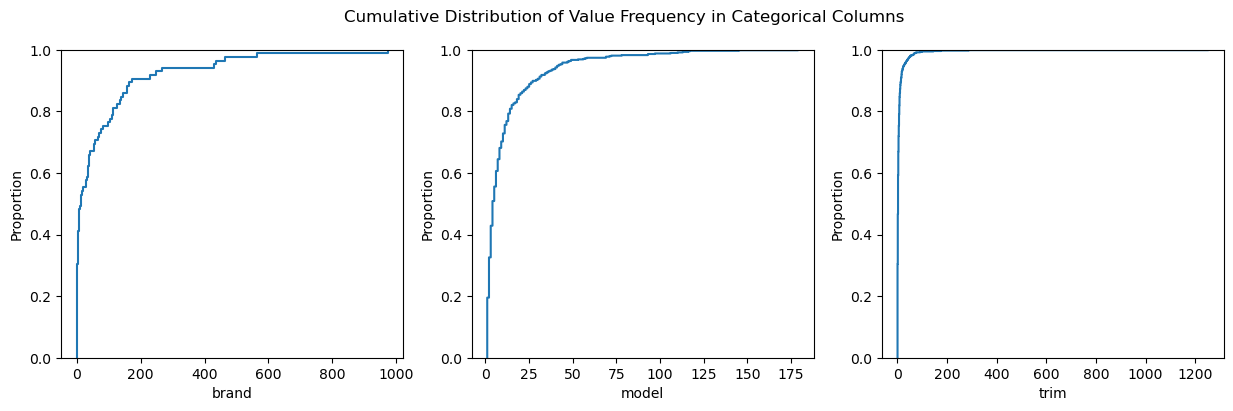

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# ax = ax.flatten()
# plt.subplots_adjust(wspace=.5, hspace=.5)

# plot the cumulative distributions for each column

for i, (col, df) in enumerate(plot_dict.items()):

    sns.ecdfplot(data=df, x='count', ax=ax[i])
    ax[i].set_xlabel(col)

fig.suptitle('Cumulative Distribution of Value Frequency in Categorical Columns')
plt.show()

### One Hot Encoding

#### Select the most frquent features by hand

In [8]:
# list of columns with more than 5 categories
diverce_categ = train_categ.columns[train_categ.nunique() > 5]

# col: df
freq_categ1 = {}


for col in diverce_categ:

    unique = train_categ[col].value_counts().reset_index()

    unique['cumulative_sum'] = unique['count'].cumsum()
    unique['cumulative_percentage'] = unique['cumulative_sum'] / unique['cumulative_sum'].iloc[-1]
    
    # save the dfs to dict
    freq_categ1[col] = unique


1. *Brand*

For me, it's debatable starting from which count to generalize categories. I think it would be unreasoble to cut out models with 12 occurences even though they belong to the least common 2%. 

THIS IS SOMETHING TO TEST EMPIRICALLY

In [9]:
freq_brand = freq_categ1['brand']

freq_brand[freq_brand['count'] > 1]



,brand,count,cumulative_sum,cumulative_percentage
0,Mercedes-Benz,973,973,0.152771
1,BMW,564,1537,0.241325
2,Nissan,463,2000,0.314021
3,Land Rover,437,2437,0.382635
4,Toyota,430,2867,0.450149
...,...,...,...,...
64,Rabdan,2,6345,0.996232
65,Borgward,2,6347,0.996546
66,Maxus,2,6349,0.996860
67,Geely,2,6351,0.997174


In [ ]:
freq_model = freq_categ1['']
freq_model[freq_model['count'] > 2].tail()

,model,count,cumulative_sum,cumulative_percentage
382,Spark,3,6095,0.956979
383,MC20,3,6098,0.957450
384,Scirocco,3,6101,0.957921
385,F430,3,6104,0.958392
386,Forte,3,6107,0.958863


Generalize the least common categories that appear in total not more than 20% of the time

In [11]:
freq_trim = freq_categ1['trim']
freq_trim[freq_trim['count'] > 1].tail()

,trim,count,cumulative_sum,cumulative_percentage
491,Unlimited Sport,2,6136,0.964628
492,C 300 Coupe,2,6138,0.964943
493,650i Gran Coupe M Sport,2,6140,0.965257
494,CLS 500 Blueefficiency Luxury,2,6142,0.965571
495,EX (2.0 L),2,6144,0.965886


In [12]:
freq_city = freq_categ1['trim']
freq_city[freq_city['count'] > 1].tail()

,trim,count,cumulative_sum,cumulative_percentage
491,Unlimited Sport,2,6136,0.964628
492,C 300 Coupe,2,6138,0.964943
493,650i Gran Coupe M Sport,2,6140,0.965257
494,CLS 500 Blueefficiency Luxury,2,6142,0.965571
495,EX (2.0 L),2,6144,0.965886


Relationship between Numerical data and the target column

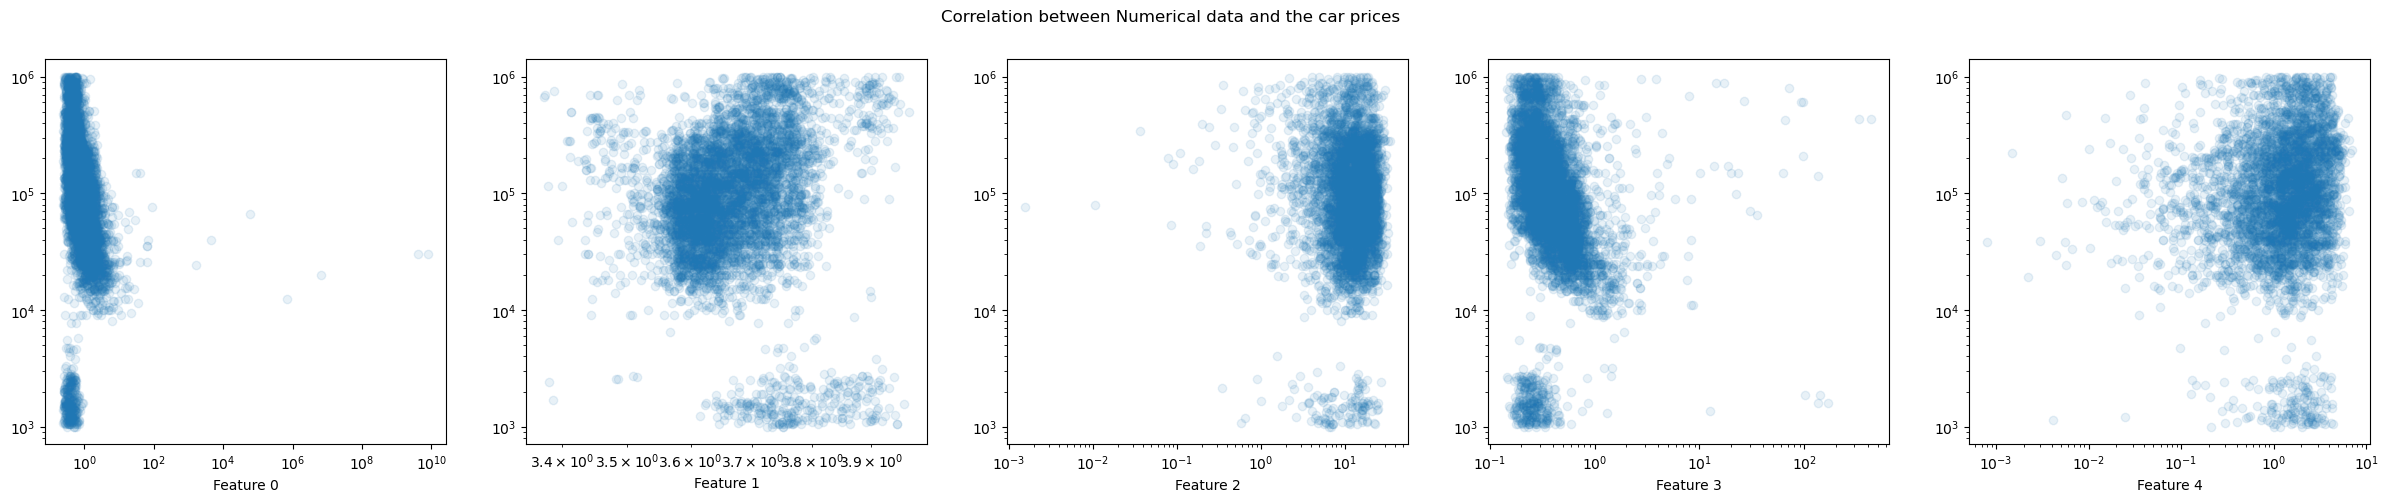

In [41]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))
# plt.subplots_adjust(wspace=.5, hspace=.5)

# plot the cumulative distributions for each column

for i in range(5):

    ax[i].scatter(x=X_train[f'{i}'], y=y_train, alpha=0.1)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

fig.suptitle('Correlation between Numerical data and the car prices')
plt.show()

Relationship between Cathegorical data and the Target column

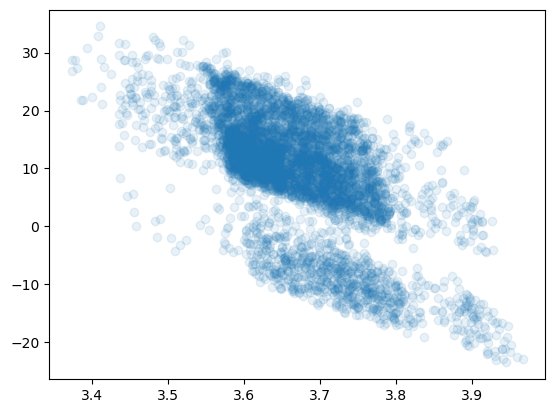

In [ ]:
plt.scatter(data=X_train, x='1', y='2', alpha=0.1)
plt.show()

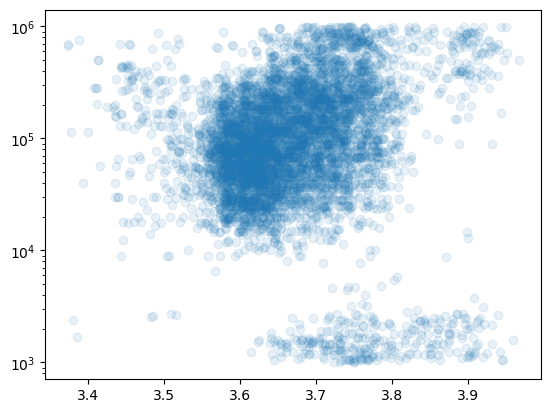

In [25]:
plt.scatter(x=X_train['1'], y=y_train, alpha=0.1)
plt.yscale('log')
plt.show()

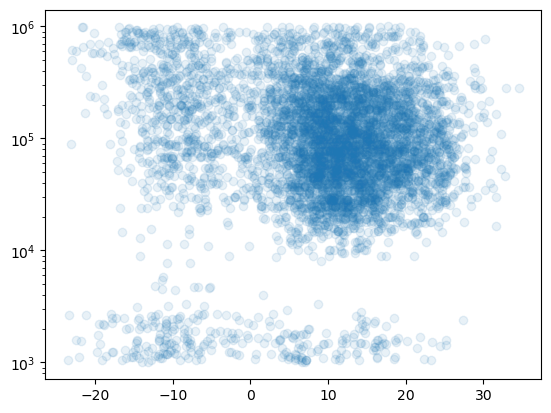

In [24]:
plt.scatter(x=X_train['2'], y=y_train, alpha=0.1)
plt.yscale('log')
plt.show()

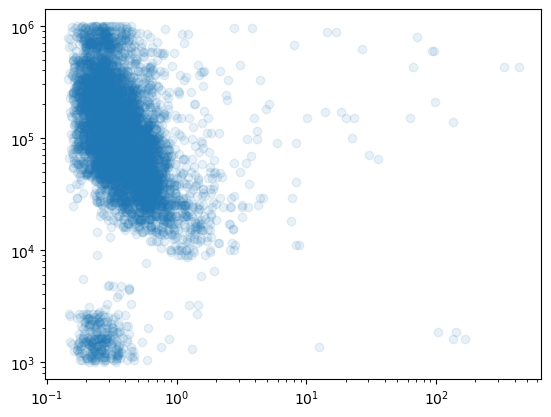

In [21]:
plt.scatter(x=X_train['3'], y=y_train, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.show()

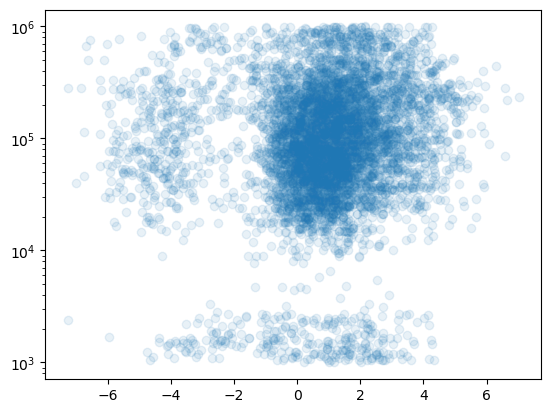

In [23]:
plt.scatter(x=X_train['4'], y=y_train, alpha=0.1)
plt.yscale('log')
plt.show()

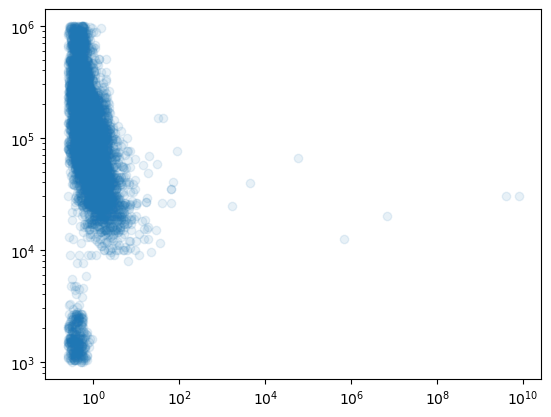

In [28]:
plt.scatter(x=X_train['0'], y=y_train, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.show()